<a href="https://colab.research.google.com/github/kimdonggyu2008/SKT_FLY_AI_6/blob/main/decision_tree_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#의사결정 나무 (iris)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

--2024-12-31 00:47:47--  https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3975 (3.9K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.88K  --.-KB/s    in 0s      

2024-12-31 00:47:48 (64.8 MB/s) - ‘iris.csv’ saved [3975/3975]



In [3]:
df=pd.read_csv('iris.csv')

In [4]:
df.shape

(150, 5)

In [5]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
df_columns=[col.replace('.','_').lower() for col in df.columns]

In [7]:
x=df.drop('variety',axis=1)
y=df['variety']

In [8]:
x,y

(     sepal.length  sepal.width  petal.length  petal.width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0         Setosa
 1         Setosa
 2         Setosa
 3         Setosa
 4         Setosa
          ...    
 145    Virginica
 146    Virginica
 147    Virginica
 148    Virginica
 149    Virginica
 Name: variety, Length: 150, dtype: object)

In [9]:
df_columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
columns=x_train.columns

In [23]:
columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'], dtype='object')

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [14]:
x_train=x_train.to_numpy()
y_train=y_train.to_numpy()


#베이스 모델

In [15]:
from sklearn.tree import DecisionTreeClassifier #분류인 경우 classifier, 연속형은 regression으로 붙음

In [16]:
clf=DecisionTreeClassifier(random_state=42)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
from sklearn.tree import plot_tree

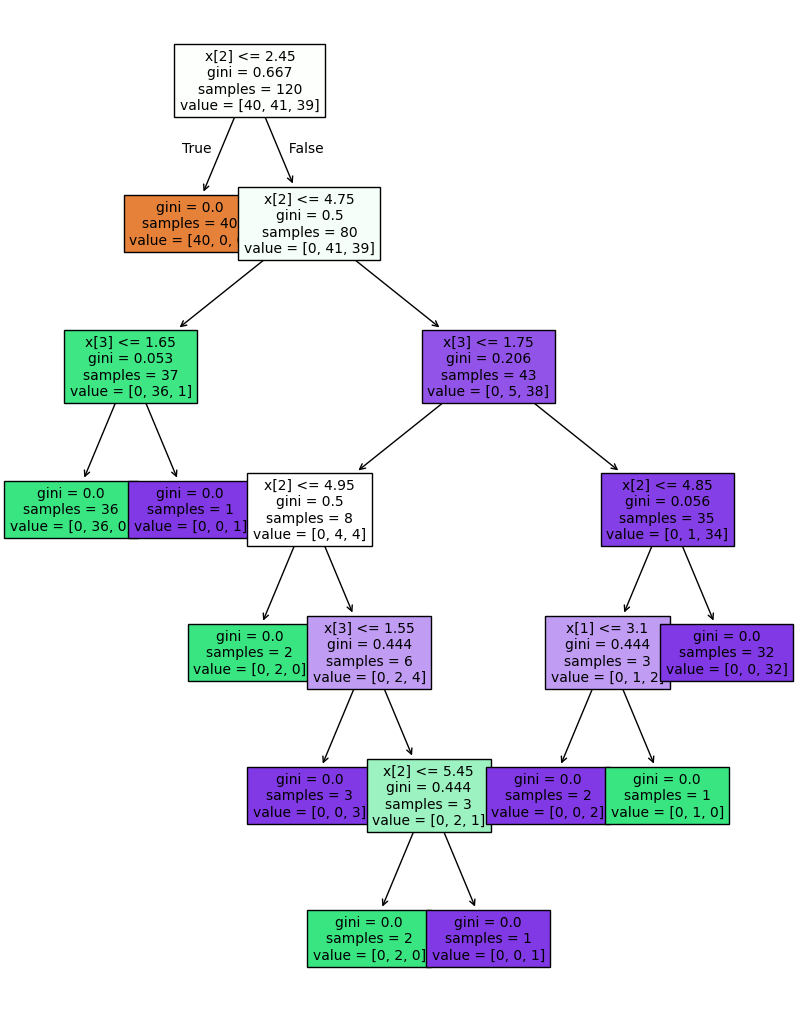

In [19]:
plt.figure(figsize=(10,13))
plot_tree(clf,filled=True,fontsize=10)
plt.show()

#규제

In [21]:
clf=DecisionTreeClassifier(random_state=42,max_depth=4,min_samples_split=4)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=4, random_state=42)

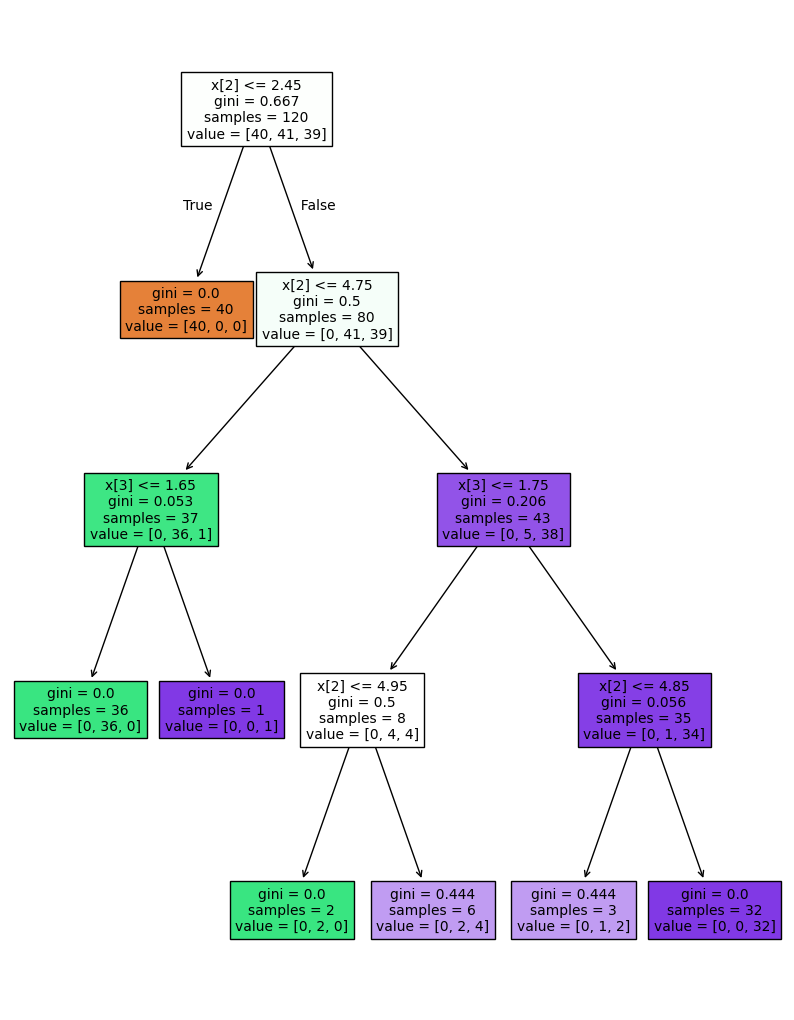

In [22]:
plt.figure(figsize=(10,13))
plot_tree(clf,filled=True,fontsize=10)
plt.show()

#테스트

In [24]:
x_test=x_test.to_numpy()
y_test=y_test.to_numpy()

In [26]:
y_pred=clf.predict(x_test)
y_pred

array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Setosa'], dtype=object)

In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix

In [28]:

def print_metrics(y_true,y_pred):
  acc=accuracy_score(y_true,y_pred)
  re=recall_score(y_true,y_pred,average='macro')
  pre=precision_score(y_true,y_pred,average='macro')
  f1=f1_score(y_true,y_pred,average='macro')

  print("acc:",acc)
  print("re:",re)
  print("pre:",pre)
  print("f1:",f1)
  cfm=confusion_matrix(y_true,y_pred)
  s=sns.heatmap(cfm,annot=True,fmt='d',cbar=False,cmap='Blues')
  s.set(xlabel='Prediction',ylabel='Actual')
  plt.show()


acc: 1.0
re: 1.0
pre: 1.0
f1: 1.0


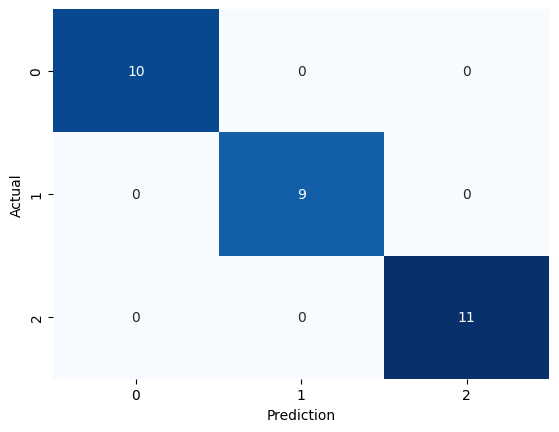

In [29]:
print_metrics(y_test,y_pred)

#변수 중요도

In [33]:
columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'], dtype='object')

In [32]:
clf.feature_importances_ #비중이 높은 요소를 통해 거의 분류가 가능함

array([0.       , 0.       , 0.9362979, 0.0637021])